In [1]:
def l(*t):
    print(t)
def ac(model,y_valid,X_valid ):
    print(accuracy_score(y_valid.tolist(),model.predict(X_valid)))
def dist(x1,y1,x2,y2):
    return np.linalg.norm(x1-x2) + np.linalg.norm(y2-y1)

'17 раз до 9 27сек'
'100 3.3 3мин'
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt


In [2]:
def readCsv(path,nrows=10000):
    data=pd.read_csv(path,
                 #dtype=types,
                 nrows=nrows,
                 parse_dates=['pickup_datetime',
                              #'dropoff_datetime',
                              
                             ],
                 date_parser=lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S %Z'),
                 usecols=
                         ['vendor_id',
                         'pickup_datetime',
                         #'dropoff_datetime',
                         'pickup_longitude',
                         'pickup_latitude',
                         'dropoff_longitude',
                         'dropoff_latitude',
                         'rate_code',
                         'passenger_count',
                         'trip_distance',

                         'fare_amount',
                         'tolls_amount',
                        ])
    return data

In [3]:
import glob
def csvs(pathmatch,nrows=10000):
    r=pd.DataFrame()
    for path in glob.glob(pathmatch):
        print(' reading '+path)
        ir=readCsv(path,nrows)
        #ir=pd.read_csv(path,nrows=nrows,date_parser=lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S %Z'))
        r=r.append(ir ,ignore_index=True)
        print(len(r))
        if(len(r)>=nrows):
            print('csvs return')
            break
    return r
        
r=csvs('qwe0*',1000)
r[:1]

 reading qwe000000000000.csv
 reading qwe000000000002.csv


,vendor_id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,fare_amount,tolls_amount
0,CMT,2010-03-04 00:35:16,-74.035201,40.721548,-74.035201,40.721548,1.0,1,0.0,0.0,0.0


In [ ]:
def create_features(sourcedata):
    data=sourcedata.copy()
    
    # create fare
    data['fare']=data['tolls_amount']+data['fare_amount']
    data=data.drop('tolls_amount',axis=1)
    data=data.drop('fare_amount',axis=1)
    
    # filter
    data=data[data['fare']>0]
    len(data[data['fare']>0])
    data=data[data.trip_distance>0]
    data=data[(data.pickup_longitude>-80)&(data.pickup_longitude<-20)] # -77
    data=data[(data.dropoff_longitude>-80)&(data.dropoff_longitude<-20)] # -77
    data=data[(data.dropoff_latitude>10)&(data.dropoff_latitude<60)] # 40
    data=data[(data.pickup_latitude>10)&(data.pickup_latitude<60)] # 40
    data=data[ data.rate_code.isnull()==False]
    #data=data[data['rate_code']!=np.nan]
    
    #
    data['p_hour']=data.pickup_datetime.map(lambda x: x.hour)
    data['p_dayofweek']=data.pickup_datetime.map(lambda x: x.dayofweek)
    data.drop('pickup_datetime',axis=1,inplace=True)
    
    # round
    data.pickup_latitude=data.pickup_latitude.apply(lambda x: np.round(x,2))#.apply(np.str)
    data.pickup_longitude=data.pickup_longitude.apply(lambda x: np.round(x,2))
    data.dropoff_latitude=data.dropoff_latitude.apply(lambda x: np.round(x,2))
    data.dropoff_longitude=data.dropoff_longitude.apply(lambda x: np.round(x,2))
    
    return data

In [4]:
r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
vendor_id            2000 non-null object
pickup_datetime      2000 non-null datetime64[ns]
pickup_longitude     2000 non-null float64
pickup_latitude      2000 non-null float64
dropoff_longitude    2000 non-null float64
dropoff_latitude     2000 non-null float64
rate_code            729 non-null float64
passenger_count      2000 non-null int64
trip_distance        2000 non-null float64
fare_amount          2000 non-null float64
tolls_amount         2000 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 172.0+ KB


In [5]:
%%time
q=r.pickup_datetime.apply(pd.to_datetime)
#q=r.pickup_datetime.apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S %Z'))

Wall time: 30 ms


In [6]:
%%time
q=r.pickup_datetime.apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S %Z'))

TypeError: strptime() argument 1 must be str, not Timestamp

In [7]:
data=readCsv('qwe000000000000.csv',nrows=100)
data.info()
#datetime.datetime.strptime('2010-03-04 00:35:16','%a %b %d %H:%M:%S %Y')
#datetime.datetime.strptime('2010-03-04 00:35:16 UTC','%Y-%m-%d %H:%M:%S %Z')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
vendor_id            100 non-null object
pickup_datetime      100 non-null datetime64[ns]
pickup_longitude     100 non-null float64
pickup_latitude      100 non-null float64
dropoff_longitude    100 non-null float64
dropoff_latitude     100 non-null float64
rate_code            22 non-null float64
passenger_count      100 non-null int64
trip_distance        100 non-null float64
fare_amount          100 non-null float64
tolls_amount         100 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 8.7+ KB


In [8]:

data2=create_features(data)
data2


,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,fare,p_hour,p_dayofweek
11,CMT,-73.99,40.75,-74.13,40.65,5.0,1,12.8,75.45,0,5
17,CMT,-73.97,40.76,-74.05,40.79,5.0,2,7.1,9.75,23,1
18,CMT,-74.01,40.71,-74.03,40.74,5.0,2,4.5,9.75,22,4
19,CMT,-73.99,40.75,-74.04,40.75,5.0,1,4.1,9.75,21,1


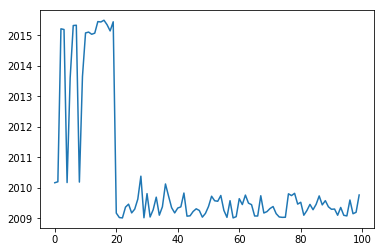

In [9]:

plt.plot(data.pickup_datetime)
#[q for q in data.pickup_datetime if q<pd.datetime(1920,10,10) ]

#data3=data2[(data2.pickup_longitude>-21)]

#dist(x1,y1,x2,y2):
#[dist(x.pickup_longitude,x.dropoff_longitude,1,1) for x in data]
#[x for x in data2.values]

In [10]:
data2.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,fare,p_hour,p_dayofweek
count,4.00000,4.000000,4.000000,4.00000,4.0,4.00000,4.000000,4.000,4.000000,4.000000
mean,-73.99000,40.742500,-74.062500,40.73250,5.0,1.50000,7.125000,26.175,16.500000,2.750000
std,0.01633,0.022174,0.045735,0.05909,0.0,0.57735,4.010299,32.850,11.030261,2.061553
min,-74.01000,40.710000,-74.130000,40.65000,5.0,1.00000,4.100000,9.750,0.000000,1.000000
25%,-73.99500,40.740000,-74.070000,40.71750,5.0,1.00000,4.400000,9.750,15.750000,1.000000
50%,-73.99000,40.750000,-74.045000,40.74500,5.0,1.50000,5.800000,9.750,21.500000,2.500000
75%,-73.98500,40.752500,-74.037500,40.76000,5.0,2.00000,8.525000,26.175,22.250000,4.250000
max,-73.97000,40.760000,-74.030000,40.79000,5.0,2.00000,12.800000,75.450,23.000000,5.000000


In [11]:
# dists=[dist(x[1],x[2],x[3],x[4]) for x in data2.values]
# plt.plot(dists)
# plt.plot(data2.trip_distance,color='red')
# dd=pd.DataFrame(dists)